# Chapter 9. Generative Models

**What is Generative Models**:

* *Generative models* are models that producing a sample as output. 


* A generative model is trained on a collection of samples that are drawn from some probability distrubtion. Its job is to produce new samples from that same probability distribution. 


* Two most popular types of generative models: **bariational autoencoder** and **generative adversarial networks**


## Variational Autoencoders (VAE)

* An *antoencoder* is a model that trieds to make its output equal to its input. You train it on a library of samples and adjust the model parameters so taht on every sample the output is as close as possible to the input. 


* For example, the input and output might each include 1,000 numbers, but in between would be a hidden layer containing only 10 numbers. This forces the model to learn how to compress the input samples. It must represeent 1,000 numbers worth of information using only 10 numbers. 


* An autoencoder doesn't need to work for all possible inputs, only ones that are drawn from a specific probability distribution. It needs to learn the "structure" of that distribution, figure out how to represent the distribution using much less information, and then be able to reconstruct the samples based on the compressed information. 

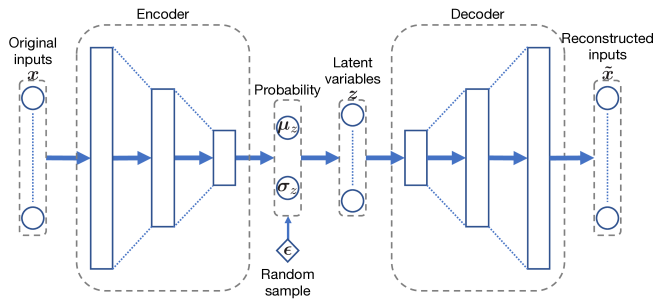

In [1]:
from IPython.display import Image
Image(filename='9va.png')

**Layers of the model**:

* **latent space**: the space of compressed representations of samples. 


* The first half of the autoencoder is **encoder**: take samples and convert them to compressed representations. 


* The second half is called **decoder**: takes compressed representations in the latent space and converts them back into the original smaples. 


* The **decoder** takes vectors in the **latent space** and converts them into samples, so we could take random vectors in the latent space (picking a random value for rach component of the vector) and pass them through the **decoder**. 


**Variational autoencoder (VAE)**: produce **EXCELLENT results**

* Adds two features to overcome the problem that *encoder may only produce vectors in a small region of the latent space*:

    1. It adds a term to the loss function that forces the latent vectors to follow a specified distribution.
        * Most often: Gaussian distribution, with a mean of 0 and a variance of 1. 
        * **We force encoder to generate vectors with a known distribution**
    
    2. During training we add random noise to the latent vector. 
        * This prevents the decoder from being too sensitive to the precise details of the latent vector. 
       

## Generative Adversarial Networks (GAN)

* **COMMON**: 

    1. **GAN** ueses the same exact decoder network to onvert latent vectors into samples (except in GANS, it is called the ***generator*** instead of the decoder)


* **But it trains network in a DIFFERENT way**:

    1. It works by passing random vectors into the generator and directly evaluating the outputs on how well they follow the expected distribution. 
    
    2. Instead of asking us to come yp with the loss function ourselves, **GAN leanrs the loss function from the data**
    

* **GAN consists of 2 parts**:
    
    1. The **generator** takes random vectors and generates synthetic samples. 
    
    2. The **discriminator** tries to distinguish the generated samples from real training samples. It takes a sample as input and outpus a probability that this is a real training sample. **It acts as a loss function for the generator.**
    
    3. Both parts are trained simultaneously. 

        * The parameter of the ***generator*** are adjusted to make the discriminator's output as close as possible to **1**. 
        * The parameter of the ***discriminator*** are adjusted to make its output as close as possible to **0**.
        * ***Real samples*** from the training set are fed into the ***discriminator***, and its parameters are adjusted to make the output close to **1**. 

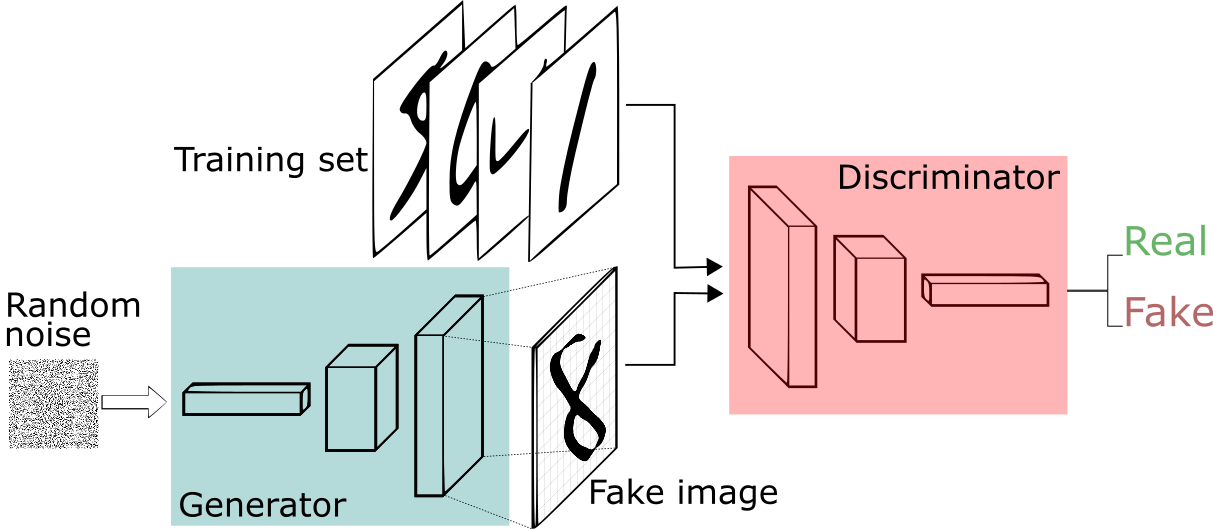

In [2]:
Image(filename='9GANS.png')

**Strength of VAE and GAN**: 

* ***GANs*** tend to produce higher-quality samples, while ***VAEs** tend to produce high-quality distributions. 


* Individual samples generated by ***GAN*** will *more closely resemble training samples*, while for ***VAE***, the range of samples generated by a VAE will more closely match the range of traning samples. 
    


## Working with Generative Models 

* We will train a **VAE** to generate new molecules, and it will output SMILES strings.

#### Step 1. Load dataset 

In [3]:
import deepchem as dc
tasks,datasets,transformers = dc.molnet.load_muv()
train_dataset, valid_dataset, test_dataset = datasets
train_smiles = train_dataset.ids

RDKit WARNING: [12:12:53] Enabling RDKit 2019.09.3 jupyter extensions


#### Step 2. Define the vocabulary our model will work with
* What is the list of characters (or "tokens") that can appear in a string?


* How long are strings allowed to be?

In [4]:
tokens = set()
for s in train_smiles:
    tokens = tokens.union(set(s))
tokens = sorted(list(tokens))
max_length = max(len(s) for s in train_smiles)

#### Step 3. Create a model 

In [5]:
from deepchem.models.optimizers import Adam, ExponentialDecay
from deepchem.models.seqtoseq import AspuruGuzikAutoEncoder

batch_size = 100
batches_per_epoch = len(train_smiles)/batch_size
learning_rate = ExponentialDecay(0.001, 0.95, batches_per_epoch)# the rate is initially set to 0.001, then decreased by 
# a little bit (multiplied by 0.95) after every epoch. This helps optimization to preceed more sommothly in many problems. 


model = AspuruGuzikAutoEncoder(tokens, max_length, model_dir='vae', 
                               batch_size=batch_size, 
                               learning_rate=learning_rate)


#### Step 4. Train the model
   * Instead of using the standard fit( ) method, **AspuruFuzikAutoEncoder** provides its own fit_sequences( )method. 

In [6]:
def generate_sequences(epochs):
    for i in range(epochs):
        for s in train_smiles:
            yield (s,s)

In [ ]:
model.fit_sequences(generate_sequences(50))